In [1]:
import numpy as np
import pandas as pd
import sklearn
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

A function to pre-process the image. It takes in the image and the no_data_value as input and returns a histogram indicating pixel values along with the number of pixels

In [2]:
def preprocessing(img,no_data_value):
    image=Image.open(img)
    image_array=np.array(image)
    red=image_array[:,:,0] #extracting the red band
    global flattened_img #declared global as it needs to be used in the next function
    flattened_img = np.column_stack([red.flatten()])
    flattened_img=np.ma.masked_values(flattened_img, no_data_value) #mask the no-data value
    plt.title('Histogram for pixel value and intensity distribution')
    plt.xlabel('Pixel values')
    plt.ylabel('Number of pixels')
    return plt.hist(flattened_img.compressed(),histtype='step')

(array([  834.,   211.,   314.,  2061.,  3971.,   783.,  1235.,   609.,
           46.,     5.]),
 array([  64. ,   83.1,  102.2,  121.3,  140.4,  159.5,  178.6,  197.7,
         216.8,  235.9,  255. ]),
 <a list of 1 Patch objects>)

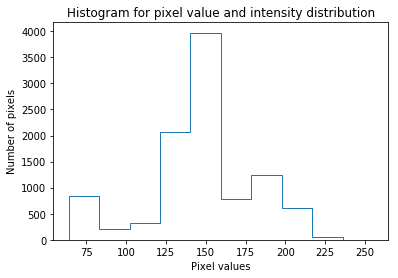

In [3]:
preprocessing('image.tif',0)

The next function is used to perform K-means clustering. It takes in as input the number of clusters and returns the segmented image. 

In [4]:
def segmentation(clusters):
    from sklearn.cluster import KMeans
    classifier = sklearn.cluster.KMeans(n_clusters=clusters)
    predicted = classifier.fit_predict(flattened_img)
    new_img = predicted.reshape((150,129))
    plt.title('Segmented Image')
    plt.imshow(new_img)
    print('The shape of the new segmented image is of shape', new_img.shape)
    return plt.show()

The shape of the new segmented image is of shape (150, 129)


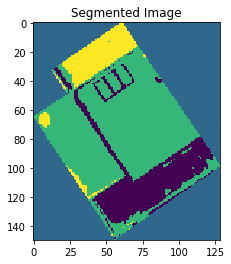

In [5]:
segmentation(4)